In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import glob

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
img = glob.glob(r'D:\ML data\tensorflow_material\dataset\unet\images\images\train\*\*.png') #tf.io.glob.glob

In [4]:
len(img)

2975

In [5]:
img[:5]

['D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\aachen\\aachen_000000_000019_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\aachen\\aachen_000001_000019_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\aachen\\aachen_000002_000019_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\aachen\\aachen_000003_000019_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\aachen\\aachen_000004_000019_leftImg8bit.png']

In [6]:
label = glob.glob(r'D:\ML data\tensorflow_material\dataset\unet\gtFine\train\*\*_gtFine_labelIds.png')

In [7]:
train_count = len(label)
train_count

2975

In [8]:
label[:3]

['D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\aachen\\aachen_000000_000019_gtFine_labelIds.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\aachen\\aachen_000001_000019_gtFine_labelIds.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\aachen\\aachen_000002_000019_gtFine_labelIds.png']

In [9]:
img[510:515]

['D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\bremen\\bremen_000240_000019_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\bremen\\bremen_000241_000019_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\bremen\\bremen_000242_000019_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\bremen\\bremen_000243_000019_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\bremen\\bremen_000244_000019_leftImg8bit.png']

In [10]:
label[510:515]

['D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\bremen\\bremen_000240_000019_gtFine_labelIds.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\bremen\\bremen_000241_000019_gtFine_labelIds.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\bremen\\bremen_000242_000019_gtFine_labelIds.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\bremen\\bremen_000243_000019_gtFine_labelIds.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\bremen\\bremen_000244_000019_gtFine_labelIds.png']

In [11]:
index = np.random.permutation(len(img))

In [12]:
img = np.array(img)[index]
label = np.array(label)[index]

In [13]:
img

array(['D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\hanover\\hanover_000000_042581_leftImg8bit.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\tubingen\\tubingen_000040_000019_leftImg8bit.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\krefeld\\krefeld_000000_030111_leftImg8bit.png',
       ...,
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\dusseldorf\\dusseldorf_000216_000019_leftImg8bit.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\strasbourg\\strasbourg_000001_025426_leftImg8bit.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\ulm\\ulm_000071_000019_leftImg8bit.png'],
      dtype='<U125')

In [14]:
img[510:515]

array(['D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\stuttgart\\stuttgart_000014_000019_leftImg8bit.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\erfurt\\erfurt_000007_000019_leftImg8bit.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\hamburg\\hamburg_000000_032906_leftImg8bit.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\weimar\\weimar_000048_000019_leftImg8bit.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\train\\zurich\\zurich_000011_000019_leftImg8bit.png'],
      dtype='<U125')

In [15]:
label[510:515]

array(['D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\stuttgart\\stuttgart_000014_000019_gtFine_labelIds.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\erfurt\\erfurt_000007_000019_gtFine_labelIds.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\hamburg\\hamburg_000000_032906_gtFine_labelIds.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\weimar\\weimar_000048_000019_gtFine_labelIds.png',
       'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\train\\zurich\\zurich_000011_000019_gtFine_labelIds.png'],
      dtype='<U122')

In [16]:
img_val = glob.glob(r'D:\ML data\tensorflow_material\dataset\unet\images\images\val\*\*.png')
label_val = glob.glob(r'D:\ML data\tensorflow_material\dataset\unet\gtFine\val\*\*_gtFine_labelIds.png')

In [17]:
val_count = len(img_val)
len(img_val),len(label_val)

(500, 500)

In [18]:
img_val[10:15]

['D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\val\\frankfurt\\frankfurt_000000_004617_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\val\\frankfurt\\frankfurt_000000_005543_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\val\\frankfurt\\frankfurt_000000_005898_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\val\\frankfurt\\frankfurt_000000_006589_leftImg8bit.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\images\\images\\val\\frankfurt\\frankfurt_000000_007365_leftImg8bit.png']

In [19]:
label_val[10:15]

['D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\val\\frankfurt\\frankfurt_000000_004617_gtFine_labelIds.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\val\\frankfurt\\frankfurt_000000_005543_gtFine_labelIds.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\val\\frankfurt\\frankfurt_000000_005898_gtFine_labelIds.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\val\\frankfurt\\frankfurt_000000_006589_gtFine_labelIds.png',
 'D:\\ML data\\tensorflow_material\\dataset\\unet\\gtFine\\val\\frankfurt\\frankfurt_000000_007365_gtFine_labelIds.png']

In [20]:
dataset_train = tf.data.Dataset.from_tensor_slices((img, label))

In [21]:
dataset_train

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [22]:
dataset_val = tf.data.Dataset.from_tensor_slices((img_val, label_val))

In [23]:
def read_png(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    return img

In [24]:
def read_png_label(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=1)
    return img

In [25]:
img_1 = read_png(img[0])
label_1 = read_png_label(label[0])

In [26]:
img_1.shape

TensorShape([1024, 2048, 3])

In [27]:
label_1.shape

TensorShape([1024, 2048, 1])

数据增强 

1. 随机反转
  tf.random.uniform()>0.5
  img = tf.image.flip_left_right()需要同时反转保证一一对应
2. 随机裁剪

In [28]:
concat_img = tf.concat([img_1,label_1], axis=-1)

In [29]:
concat_img.shape

TensorShape([1024, 2048, 4])

In [30]:
def crop_img(img, mask):
    concat_img = tf.concat([img, mask], axis=-1)
    concat_img = tf.image.resize(concat_img, (280,280),
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    crop_img = tf.image.random_crop(concat_img, [256,256,4])
    return crop_img[:,:,:3], crop_img[:,:,3:] #:表示需要这个维度，不然切成二维

In [31]:
img_1, label_1 =crop_img(img_1,label_1)

In [32]:
label_1.shape

TensorShape([256, 256, 1])

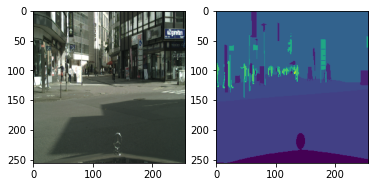

In [33]:
plt.subplot(1,2,1)
plt.imshow(img_1.numpy())
plt.subplot(1,2,2)
plt.imshow(np.squeeze(label_1.numpy()))

In [34]:
def normal(img, mask):
    img = tf.cast(img, tf.float32)/127.5-1
    mask = tf.cast(mask, tf.int32)
    return img, mask

In [35]:
def load_image_train(img_path, mask_path):
    img = read_png(img_path)
    mask = read_png_label(mask_path)
    
    img,mask = crop_img(img, mask)
    
    if tf.random.uniform(())>0.5:
        img = tf.image.flip_left_right(img)
        mask = tf.image.flip_left_right(mask)
        
    img, mask=normal(img, mask)
    
    return img, mask

In [36]:
def load_image_val(img_path, mask_path):
    img = read_png(img_path)
    mask = read_png_label(mask_path)
    
    img = tf.image.resize(img, (256,256))
    mask = tf.image.resize(mask, (256,256))
    
        
    img, mask=normal(img, mask)
    
    return img, mask

In [37]:
BATCH_SIZE = 6
BUFFER_SIZE = 300
STEP_PER_EPOCH = train_count//BATCH_SIZE
VAL_STEP = val_count//BATCH_SIZE

In [38]:
auto = tf.data.experimental.AUTOTUNE

In [39]:
dataset_train = dataset_train.map(load_image_train,num_parallel_calls=auto)
dataset_val = dataset_val.map(load_image_val, num_parallel_calls=auto)

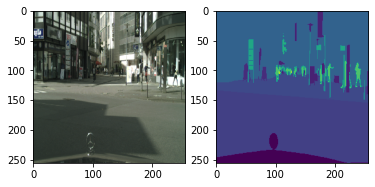

In [40]:
for i, m in dataset_train.take(1):
    plt.subplot(1,2,1)
    plt.imshow((i.numpy()+1)/2)
    plt.subplot(1,2,2)
    plt.imshow(np.squeeze(m.numpy()))

In [41]:
dataset_train = dataset_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [42]:
dataset_val = dataset_val.batch(BATCH_SIZE)

定义UNET模型

In [43]:
class Downsample(tf.keras.layers.Layer):
    def __init__(self,units):
        super(Downsample, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(units, kernel_size=3,
                                            padding='same')
        self.conv2 = tf.keras.layers.Conv2D(units, kernel_size=3,
                                            padding='same')
        self.pool = tf.keras.layers.MaxPooling2D()
    def call(self, x, is_pool=True):
        if is_pool:
            x = self.pool(x)
        x = self.conv1(x)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = tf.nn.relu(x)
        return x

In [44]:
Downsample.trainable_variables

In [45]:
class Upsample(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Upsample, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(units, kernel_size=3,
                                            padding='same')
        self.conv2 = tf.keras.layers.Conv2D(units, kernel_size=3,
                                            padding='same')
        self.deconv = tf.keras.layers.Conv2DTranspose(units//2,
                                                      kernel_size=2,
                                                      strides = 2,
                                                      padding='same')
    def call(self, x):
        x = self.conv1(x)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = tf.nn.relu(x)
        x = self.deconv(x)
        x = tf.nn.relu(x)
        return x       

In [46]:
class Unet_model(tf.keras.Model):
    def __init__(self):
        super(Unet_model, self).__init__()
        self.down1 = Downsample(64) #chushihuabuyongchuli  is_pool
        self.down2 = Downsample(128)
        self.down3 = Downsample(256)
        self.down4 = Downsample(512)
        self.down5 = Downsample(1024)
        
        self.up = tf.keras.layers.Conv2DTranspose(512,
                                                  kernel_size = 2,
                                                  strides = 2,
                                                  padding = 'same')
        
        self.up1 = Upsample(512)
        self.up2 = Upsample(256)
        self.up3 = Upsample(128)
        
        self.conv_last = Downsample(64)
        
        self.last = tf.keras.layers.Conv2D(34,
                                           kernel_size=1,
                                           padding='same')
    def call(self, x):
        x1 = self.down1(x, is_pool=False)
        x2 = self.down2(x1)
        x3 = self.down3(x2)
        x4 = self.down4(x3)
        x5 = self.down5(x4)
        
        x5 = self.up(x5)
        
        x5 = tf.concat([x4,x5], axis=-1)
        x5 = self.up1(x5)
        
        x5 = tf.concat([x3,x5], axis=-1)
        x5 = self.up2(x5)
        
        x5 = tf.concat([x2,x5], axis=-1)
        x5 = self.up3(x5)
        
        x5 = tf.concat([x1,x5], axis=-1)
        
        x5 = self.conv_last(x5, is_pool=False)
        
        x5 = self.last(x5)
        return x5

In [47]:
model = Unet_model()

In [48]:
model

In [49]:
opt = tf.keras.optimizers.Adam(0.0001)

In [50]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #labels is 0.1.2...

In [51]:
class MeanIOU(tf.keras.metrics.MeanIoU):
    def __call__(self, y_true, y_pred):
        y_pred = tf.argmax(y_pred, axis=-1)
        return super().__call__(y_true,y_pred)

In [52]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='train_acc')
train_iou = MeanIOU(34, name='train_iou')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='test_acc')
test_iou = MeanIOU(34, name='test_iou')

In [53]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_function(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    opt.apply_gradients(zip(gradients,model.trainable_variables))
    
    train_loss(loss)
    train_acc(labels, predictions)
    train_iou(labels,predictions)

In [54]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_function(labels, predictions)
    
    test_loss(t_loss)
    test_acc(labels, predictions)
    test_iou(labels, predictions)

In [55]:
EPOCHS = 10

for epoch in range(EPOCHS):
    #在下一个epoch开始时，重置评估指标
    train_loss.reset_states()
    train_acc.reset_states()
    train_iou.reset_states()
    test_loss.reset_states()
    test_acc.reset_states()
    test_iou.reset_states()
    
    for images, labels in dataset_train:
        train_step(images, labels)
        
    for test_images, test_labels in dataset_val:
        test_step(test_images, test_labels)
        
    template = 'Epoch {:.1f}, \
                Loss: {:.3f}, Accuracy: {:.3f}, IOU: {:.3f}, \
                Test Loss: {:.3f},  Test Accuacy: {:.3f}, Test IOU: {:.3f}'
    
    print(template.format(epoch+1,
                          train_loss.result(),
                          train_acc.result()*100,
                          train_iou.result(),
                          test_loss.result(),
                          test_acc.result()*100,
                          test_iou.result()
                         ))

Epoch 1.0,                 Loss: 1.703, Accuracy: 50.554, IOU: 0.055,                 Test Loss: 1.382,  Test Accuacy: 56.188, Test IOU: 0.067
Epoch 2.0,                 Loss: 1.140, Accuracy: 65.432, IOU: 0.092,                 Test Loss: 1.270,  Test Accuacy: 67.132, Test IOU: 0.096
Epoch 3.0,                 Loss: 0.963, Accuracy: 73.059, IOU: 0.115,                 Test Loss: 1.084,  Test Accuacy: 71.445, Test IOU: 0.113
Epoch 4.0,                 Loss: 0.860, Accuracy: 76.592, IOU: 0.130,                 Test Loss: 0.962,  Test Accuacy: 74.900, Test IOU: 0.136
Epoch 5.0,                 Loss: 0.774, Accuracy: 79.111, IOU: 0.150,                 Test Loss: 0.933,  Test Accuacy: 75.890, Test IOU: 0.143
Epoch 6.0,                 Loss: 0.733, Accuracy: 80.269, IOU: 0.159,                 Test Loss: 0.898,  Test Accuacy: 76.653, Test IOU: 0.144
Epoch 7.0,                 Loss: 0.695, Accuracy: 81.216, IOU: 0.169,                 Test Loss: 0.888,  Test Accuacy: 77.578, Test IOU: 0.153